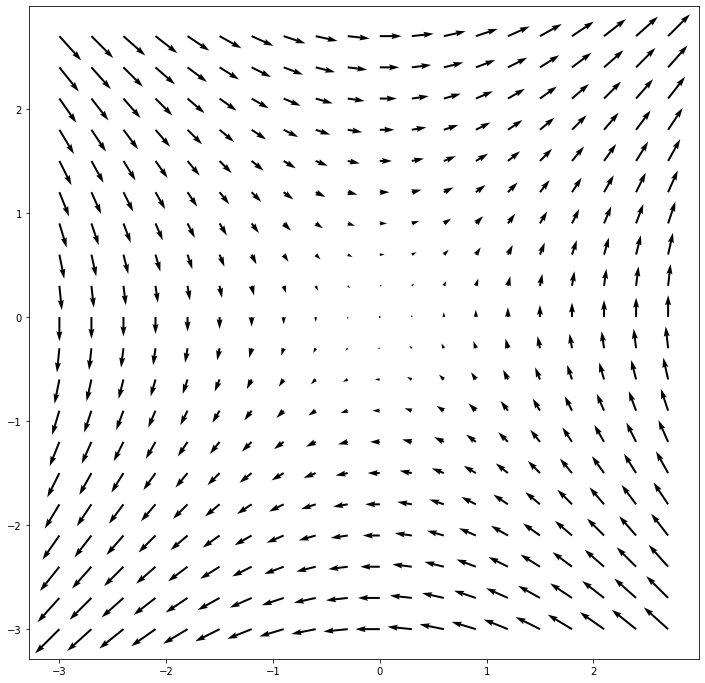

In [2]:
# Sample code to show gradient field using python
import numpy as np
import matplotlib.pyplot as plt

dx, dy = .3, .3
x = np.arange(-3, 3, dx)
y = np.arange(-3, 3, dy)

xx, yy = np.meshgrid(x, y, indexing='ij')
zz = xx * yy

gradx, grady = np.gradient(zz, dx, dy)
plt.figure(figsize=(12,12))
plt.quiver(xx, yy, gradx, grady)


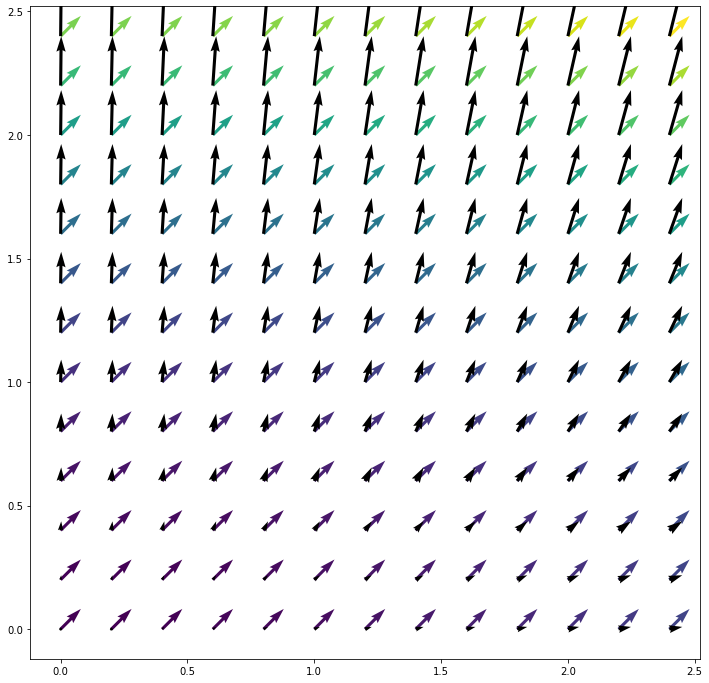

In [3]:

import numpy as np
import matplotlib.pyplot as plt

# spacing between arrows
dx, dy = .2, .2

# control the extent of the x and y axis
x = np.arange(0, 2.5, dx)
y = np.arange(0, 2.5, dy)

xx, yy = np.meshgrid(x, y, indexing='ij')

P = 4 * xx + 4 * yy 
g = xx*xx + 4 * yy*yy

color = g

Px, Py = np.gradient(P, dx, dy)
gx, gy = np.gradient(g, dx, dy)

plt.figure(figsize=(12,12)) 
plt.quiver(xx, yy, Px, Py, color)
plt.quiver(xx, yy, gx, gy)

In [4]:
import sympy as sp

x      = sp.symbols('x')
y      = sp.symbols('y')
lam    = sp.symbols('lambda')

fxy    = 4 * x + 4 * y      # objective function
fxy_x  = sp.diff(fxy, x)
fxy_y  = sp.diff(fxy, y)

gxy    = x**2 + 4*y**2      # constraint function (= 4)
gxy_x  = sp.diff(gxy, x)
gxy_y  = sp.diff(gxy, y)

# use sequence unpacking to workaround FiniteSet unpacking problem
# (https://stackoverflow.com/a/49981950/1953757)
l1,    = sp.solveset(fxy_x - lam * gxy_x, lam)  # lam in terms of x
l2,    = sp.solveset(fxy_y - lam * gxy_y, lam)  # lam in terms of y

# solve for x and y
# NB: solveset() returns a weird Complement set
x1,    = sp.solve(l1 - l2, x)  # x in terms of y
y1,    = sp.solve(l1 - l2, y)  # y in terms of x

# plug x1 and y1 into gxy
# NB: we're only interested in the positive results.
# It would be better to restrict the solutions to the positive domain.
_, x2  = sp.solveset(gxy.subs({y: y1}) - 4, x)
_, y2  = sp.solveset(gxy.subs({x: x1}) - 4, y)
display(x2)
display(y2)

display(fxy.subs({x: x2, y: y2}))  # winner
display(fxy.subs({x:  0, y:  1}))
display(fxy.subs({x:  2, y:  0}))

4*sqrt(5)/5

sqrt(5)/5

4*sqrt(5)

4

8

In [9]:
import numpy as np

x = np.array([2004, 2006, 2008, 2010])
y = np.array([4.4,39.41,54.83,50.31])

x1 = x.sum()
x2 = (x**2).sum()
x3 = (x**3).sum()
x4 = (x**4).sum()
yx2 = (y*x**2).sum()
yx1 = (y*x).sum()
y1 = (y).sum()

print(f'a*{x4}+b*{x3}+c*{x2}={yx2}')
print(f'a*{x3}+b*{x2}+c*{x1}={yx1}')
print(f'a*{x2}+b*{x1}+c*4={y1}')


a*64901198351648+b*32337297792+c*16112216=600593229.28
a*32337297792+b*16112216+c*8028=299095.80000000005
a*16112216+b*8028+c*4=148.95


In [11]:
def solve_quadratic():
    X = [2004, 2006, 2008, 2010]
    Y = [4.4, 39.41, 54.83, 50.31]
    coeffs = np.polyfit(X, Y, 1)
    slope, intercept = coeffs[0], coeffs[1]
    if intercept > 0:
        sign = "+"
    else:
        sign = ""
    print(f'y = {slope:.1f}x {sign} {intercept:.1f}')
    x = 2014
    predic = slope*x+intercept
    print(f'Prediction for {x}: {predic:.3f}')
    actual = 14.38
    print(f'Percentage error : {np.abs(actual-predic)/actual*100:.0f}%')
    coeffs = np.polyfit(X, Y, 2)
    quadratic, slope, intercept = coeffs[0], coeffs[1], coeffs[2]
    print(f'y = {quadratic:.1f}x^2 + {slope:.1f}x + {intercept:.1f}')
    x = 2012
    predic = quadratic*x**2 + slope*x+intercept
    print(f'Prediction for {x}: {predic:.3f}')
    actual = 35.17
    print(f'Percentage error : {np.abs(actual-predic)/actual*100:.1f}%')
    
solve_quadratic()

y = 7.7x  -15331.4
Prediction for 2014: 90.840
Percentage error : 532%
y = -2.5x^2 + 9924.7x + -9967117.6
Prediction for 2012: 26.113
Percentage error : 25.8%


In [14]:
import scipy.stats
X = [2004, 2006, 2008, 2010]
Y = [4.4, 39.41, 54.83, 50.31]

scipy.stats.linregress(X, Y)

LinregressResult(slope=7.657500000000001, intercept=-15331.365000000002, rvalue=0.8660957575377853, pvalue=0.13390424246221463, stderr=3.1251453966175724, intercept_stderr=6272.170703817182)

In [15]:
import scipy.stats

X = [65.2,21.9,-14.1,29.6,2.1,64.5,5.5,36.7,43.0,6.2,21.6,-1.7,-12.1,22.8,41.7,68.3,64.2,53.0,62.8,-14.5]
Y = [-48.2,53.9,86.1,15.1,68.3,-41.7,80.8,2.6,1.8,73.0,53.0,49.3,77.7,27.7,9.5,-37.5,-30.5,-37.1,-28.8,67.2]
scipy.stats.linregress(X, Y)

LinregressResult(slope=-1.572975957441847, intercept=66.68027375411474, rvalue=-0.9584947084458765, pvalue=2.9854887102284065e-11, stderr=0.11028312100708873, intercept_stderr=4.401600246386989)

In [16]:
import scipy.stats

X = [1,1,2]
Y = [1,3,4]
scipy.stats.linregress(X, Y)

LinregressResult(slope=2.0, intercept=0.0, rvalue=0.7559289460184544, pvalue=0.45437105165700997, stderr=1.7320508075688776, intercept_stderr=2.4494897427831788)

In [24]:
import scipy.stats
import math
import numpy as np

X = np.log(np.array([1,1,2]))
Y = np.log(np.array([1,3,4]))
scipy.stats.linregress(X, Y), math.exp(0.549306144334055)


(LinregressResult(slope=1.2075187496394215, intercept=0.549306144334055, rvalue=0.6605092312865815, pvalue=0.54068087517977, stderr=1.3726177896702332, intercept_stderr=0.5493061443340549),
 1.7320508075688776)

In [26]:
import scipy.stats
import math
import numpy as np

X = np.array([1,1,2])
Y = np.log(np.array([1,3,4]))
scipy.stats.linregress(X, Y), math.exp(-0.287682)


(LinregressResult(slope=0.8369882167858357, intercept=-0.2876820724517808, rvalue=0.6605092312865815, pvalue=0.54068087517977, stderr=0.9514261508963461, intercept_stderr=1.3455197661940435),
 0.7500000543388377)

In [1]:
import scipy.stats

X = [-1,1,0]
Y = [1,-1,2]
scipy.stats.linregress(X, Y)

LinregressResult(slope=-1.0, intercept=0.6666666666666666, rvalue=-0.6546536707079771, pvalue=0.5456289483429901, stderr=1.1547005383792517, intercept_stderr=0.9428090415820635)